<a href="https://colab.research.google.com/github/afrojaakter/Surrogate-Based-Optimization/blob/main/Kriging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
!pip install smt

     |████████████████████████████████| 248 kB 3.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 47 kB 2.8 MB/s 
  Created wheel for smt: filename=smt-1.0.0-cp37-cp37m-linux_x86_64.whl size=522117 sha256=b576a8e86ca8054e7e7eba53735a5d615331c83e5ad817d649ca6873c00f07ea
  Stored in directory: /root/.cache/pip/wheels/42/e6/ef/c78c5dc521a6d99898ea8842ffcdfb4d8854f39af1a438bc7a
  Created wheel for pyDOE2: filename=pyDOE2-1.3.0-py3-none-any.whl size=25538 sha256=0704d6ae6090ab675c2bb3cb0c3f2ca8095953f6adfd8797894669d73971bb9e
  Stored in directory: /root/.cache/pip/wheels/49/91/2d/d08e80806bf7756193541f6c03c0492af288fcd6158d3d0998
Successfully built smt pyDOE2


___________________________________________________________________________
   
                                  Kriging
___________________________________________________________________________
   
 Problem size
   
      # training points.        : 5
   
___________________________________________________________________________
   
 Training
   
   Training ...
   Training - done. Time (sec):  0.0443945
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 100
   
   Predicting ...
   Predicting - done. Time (sec):  0.0003428
   
   Prediction time/pt. (sec) :  0.0000034
   
___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 5
   
   Predicting ...
   Predicting - done. Time (sec):  0.0002759
   
   Prediction time/pt. (sec) :  0.0000552
   


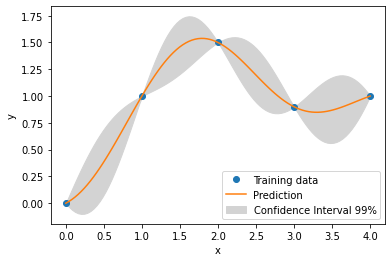

In [15]:
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import KRG

xt = np.linspace(0.0, 4.0, 5)
yt = np.array([0.0, 1.0, 1.5, 0.9, 1])

sm = KRG(theta0 = [1e-2])
sm.set_training_values(xt, yt)
sm.train()

num = 100
x_test = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x_test)

#estimte variance
s2 = sm.predict_variances(x)
#derivative according to the first variable
dydx = sm.predict_derivatives(xt, 0)

fig, axs = plt.subplots(1)
#add a plot with variance
axs.plot(xt, yt, 'o')
axs.plot(x, y)
axs.fill_between(
    np.ravel(x_test),
    np.ravel(y - 3 * np.sqrt(s2)),
    np.ravel(y + 3 * np.sqrt(s2)),
    color="lightgrey",
)
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

plt.show()

___________________________________________________________________________
   
 Evaluation
   
      # eval points. : 500
   
   Predicting ...
   Predicting - done. Time (sec):  0.0006292
   
   Prediction time/pt. (sec) :  0.0000013
   


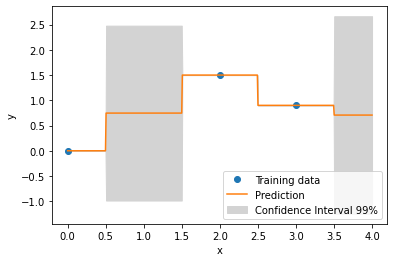

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from smt.surrogate_models import KRG
from smt.applications.mixed_integer import MixedIntegerSurrogateModel, INT

xt = np.array([0.0, 2.0, 3.0])
yt = np.array([0.0, 1.5, 0.9])

# xtypes = [FLOAT, INT, (ENUM, 3), (ENUM, 2)]
# FLOAT means x1 continuous
# INT means x2 integer
# (ENUM, 3) means x3, x4 & x5 are 3 levels of the same categorical variable
# (ENUM, 2) means x6 & x7 are 2 levels of the same categorical variable

sm = MixedIntegerSurrogateModel(
    xtypes=[INT], xlimits=[[0, 4]], surrogate=KRG(theta0=[1e-2])
)
sm.set_training_values(xt, yt)
sm.train()

num = 500
x = np.linspace(0.0, 4.0, num)
y = sm.predict_values(x)
# estimated variance
s2 = sm.predict_variances(x)

fig, axs = plt.subplots(1)
axs.plot(xt, yt, "o")
axs.plot(x, y)
axs.fill_between(
    np.ravel(x),
    np.ravel(y - 3 * np.sqrt(s2)),
    np.ravel(y + 3 * np.sqrt(s2)),
    color="lightgrey",
)
axs.set_xlabel("x")
axs.set_ylabel("y")
axs.legend(
    ["Training data", "Prediction", "Confidence Interval 99%"],
    loc="lower right",
)

plt.show()

Reference: https://smt.readthedocs.io/en/latest/_src_docs/surrogate_models.html